<a href="https://colab.research.google.com/github/fr1989/dataScientist/blob/main/tamrin3(2_ml).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!wget https://raw.githubusercontent.com/fr1989/dataScientist/main/master/dataset.py
#!wget https://github.com/fr1989/dataScientist/blob/main/master/dataset/Data_hoda_full.mat -P dataset

--2024-05-28 15:59:39--  https://github.com/fr1989/dataScientist/blob/main/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dataset/Data_hoda_full.mat’

Data_hoda_full.mat      [ <=>                ] 259.55K  1.42MB/s    in 0.2s    

2024-05-28 15:59:40 (1.42 MB/s) - ‘dataset/Data_hoda_full.mat’ saved [265780]



In [3]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import pickle

from dataset import load_hoda

In [6]:
X_train, y_train, X_test, y_test = load_hoda(1000,200,15)

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pickle_file = "best_knn_model.pkl"
with open(pickle_file, 'wb') as file:
    pickle.dump(knn, file)

In [9]:
pickle_file = "best_knn_model.pkl"
with open(pickle_file, 'rb') as file:
    loaded_knn = pickle.load(file)

(78, 61)
Prediction: [3]


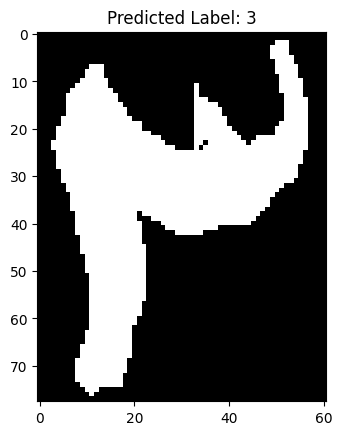

In [11]:
from PIL import Image
import cv2
target_size = (15, 15)
# Preprocess the test image
image_path = "adad.png"
image = Image.open(image_path)

# Convert image to grayscale (1 channel)
image = image.convert('L')

image_array = np.array(image)

print(image_array.shape)

image_array = cv2.resize(image_array,(15,15))

image_array = np.reshape(image_array, [-1,15**2])

# Use the loaded model to make predictions
prediction = loaded_knn.predict(image_array)
print("Prediction:", prediction)

# Optionally, display the image
plt.imshow(np.array(Image.open(image_path)), cmap='gray')
plt.title(f"Predicted Label: {prediction[0]}")
plt.show()